### Import Libraries

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dropout, add
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
def FCN8s(image_size, ch_in=3, ch_out=3):
    
    inputs = Input(shape=(*image_size, ch_in), name='input')
    vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=inputs)
    
    f3 = vgg16.get_layer('block3_pool').output
    f4 = vgg16.get_layer('block4_pool').output
    f5 = vgg16.get_layer('block5_pool').output
    
    f5_conv1 = Conv2D(filters=4086, kernel_size=7, padding='same', activation='relu')(f5)
    f5_drop1 = Dropout(0.5)(f5_conv1)
    f5_conv2 = Conv2D(filters=4086, kernel_size=1, padding='same', activation='relu')(f5_drop1)
    f5_drop2 = Dropout(0.5)(f5_conv2)
    f5_conv3 = Conv2D(filters=ch_out, kernel_size=1, padding='same', activation=None)(f5_drop2)
    
    f5_conv3_x2 = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2, use_bias=False, padding='same', activation='relu')(f5)
    f4_conv1 = Conv2D(filters=ch_out, kernel_size=1, padding='same', activation=None)(f4)
    
    merge1 = add([f4_conv1, f5_conv3_x2])
    
    merge1_x2 = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2, use_bias=False, padding='same', activation='relu')(merge1)
    f3_conv1 = Conv2D(filters=ch_out, kernel_size=1, padding='same', activation=None)(f3)
    
    merge2 = add([f3_conv1, merge1_x2])
    
    outputs = Conv2DTranspose(filters=ch_out, kernel_size=16, strides=8, padding='same', activation=None)(merge2)
    
    model = Model(inputs, outputs)
    
    return model

In [3]:
model = FCN8s(image_size=(224, 224))

58900480/58889256 [==============================] - 0s 0us/step


In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

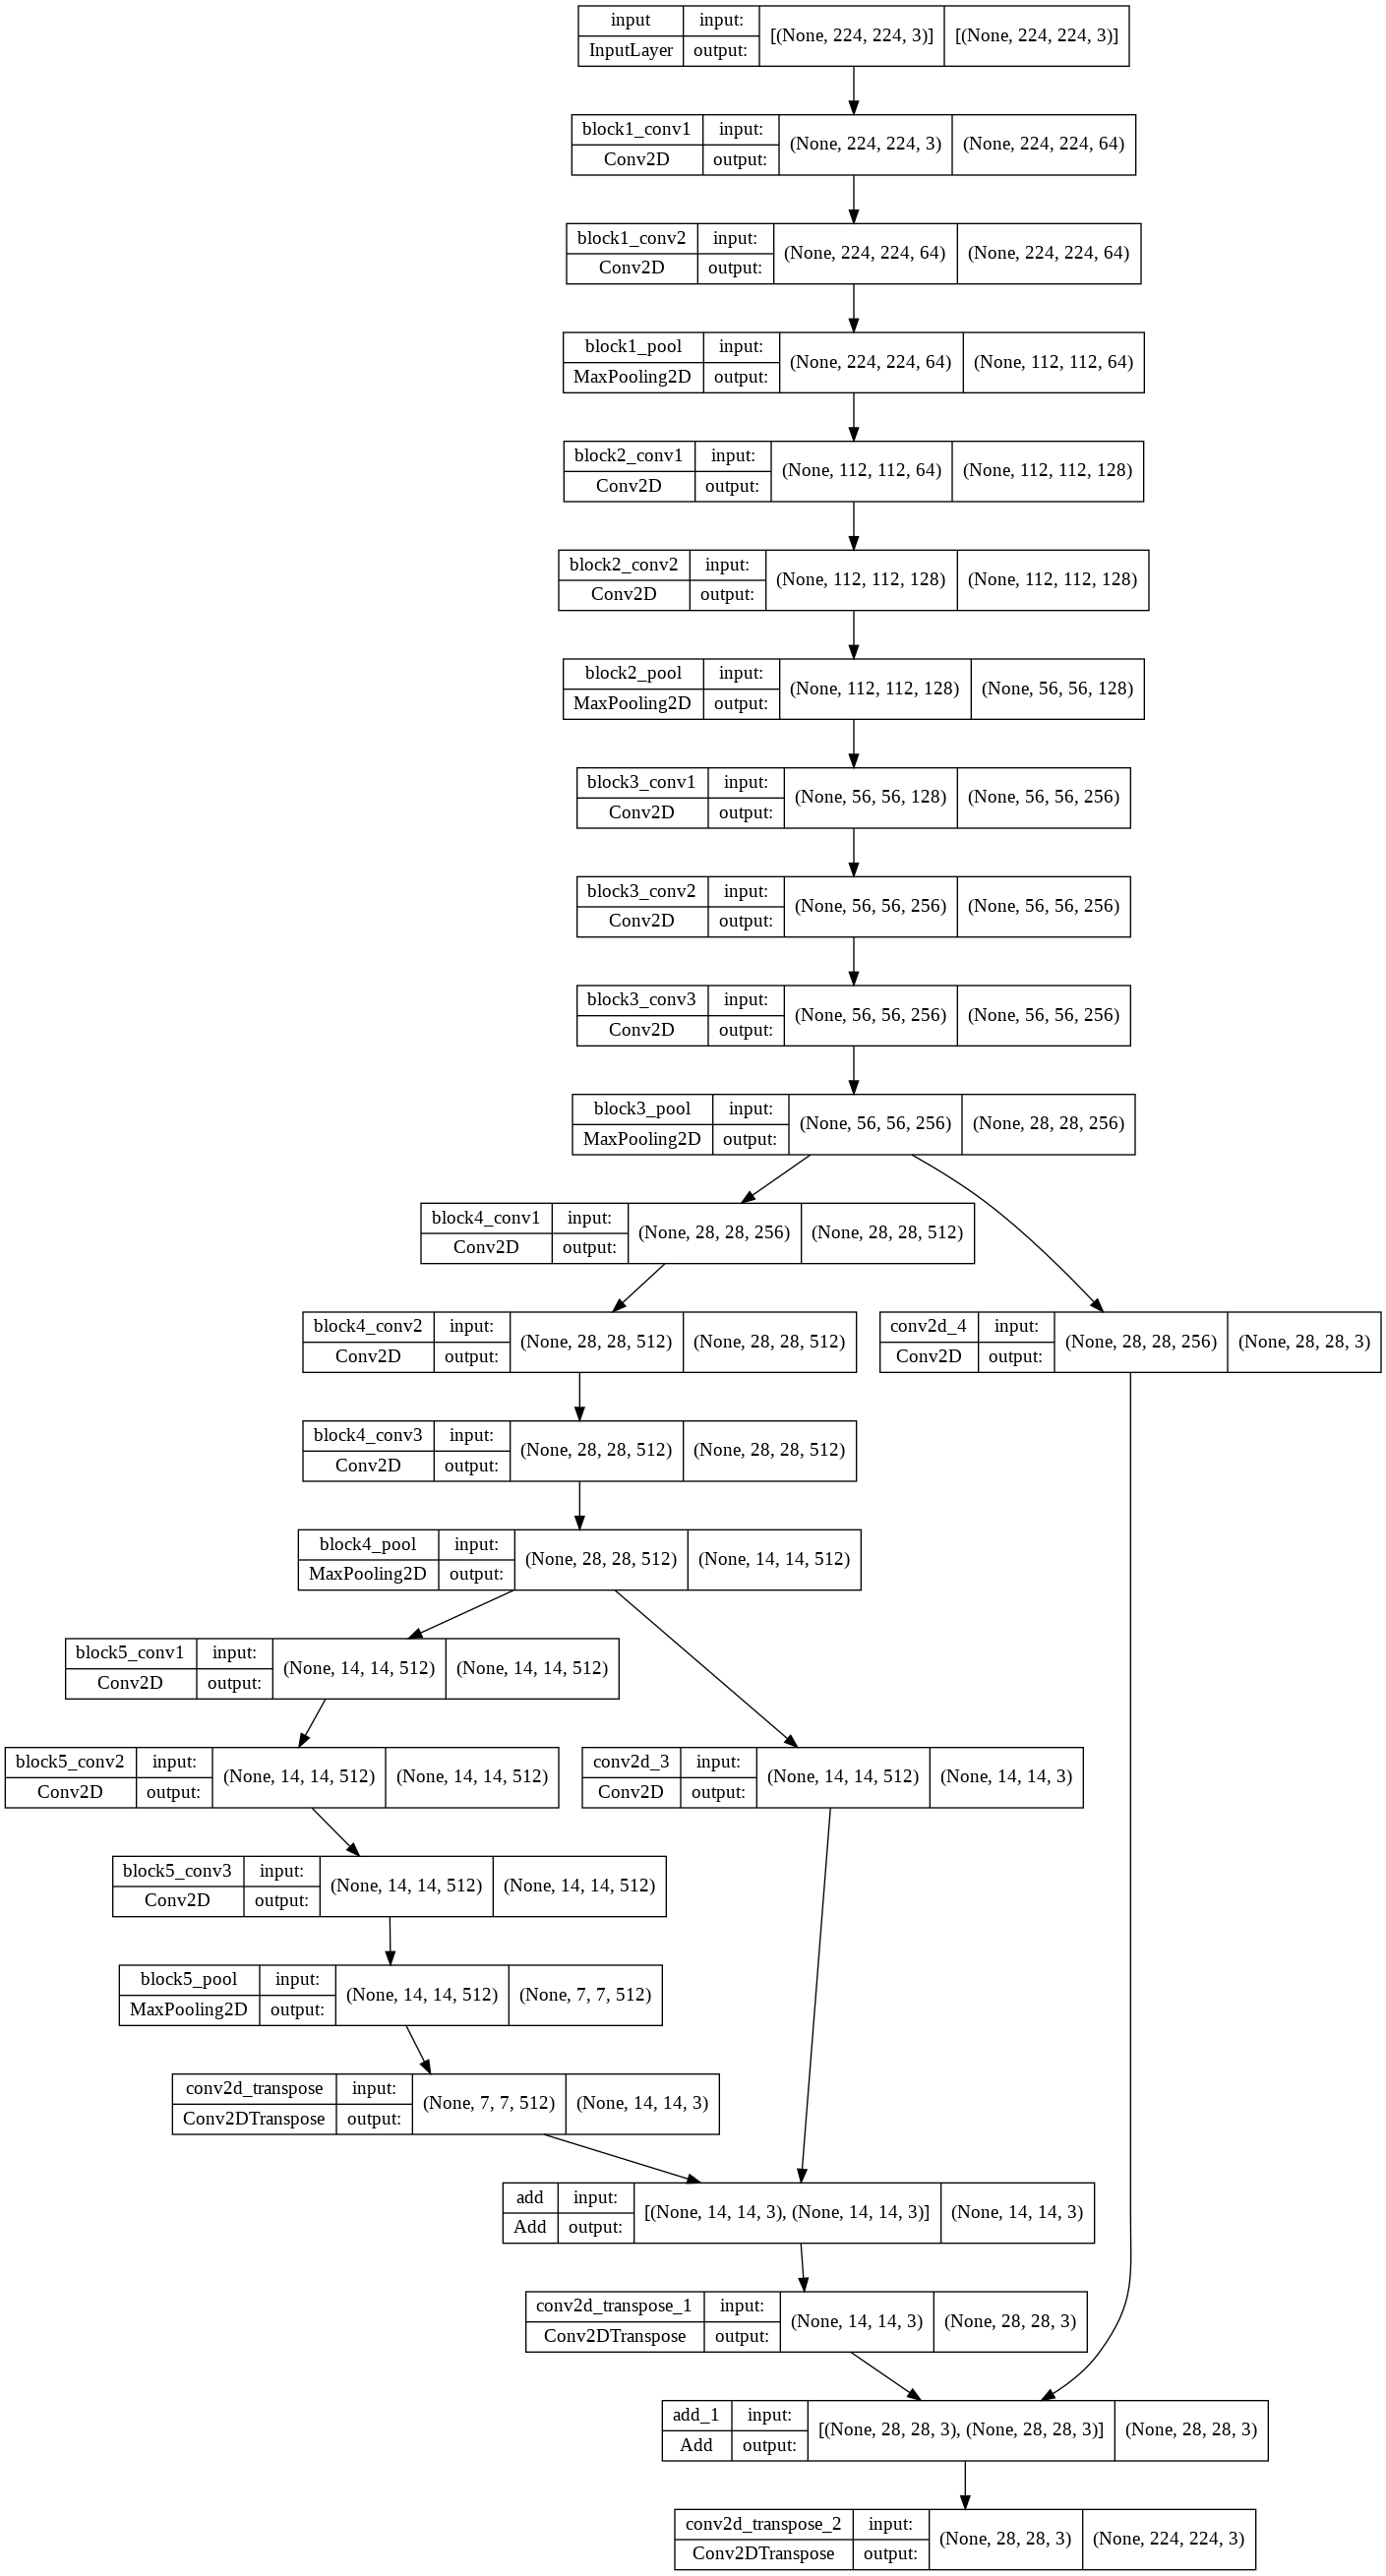

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)